In [1]:
import pandas as pd
from helpers import *

## The current game

<AxesSubplot: xlabel='bets_made'>

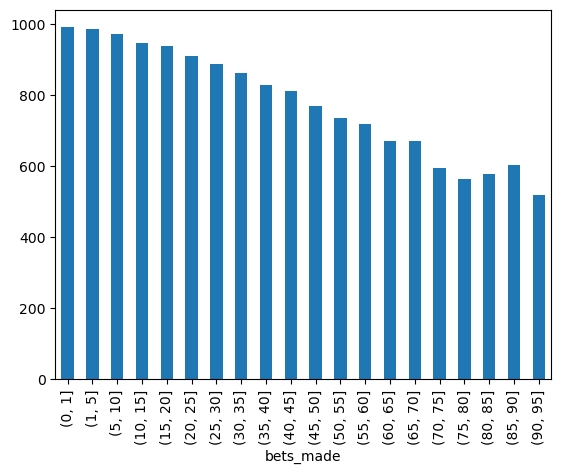

In [2]:
results = pd.DataFrame()

for i in range(10000):
    game = init_game()
    sim(game)
    results = pd.concat((results, summarize(game, i)))
    
binned = pd.cut(results.bets_made, bins=[0, 1] + list(range(5, 100, 5)))
results.groupby(binned).balance.median().plot(kind='bar')

## With a $1 burn per offering not taken

<AxesSubplot: xlabel='bets_made'>

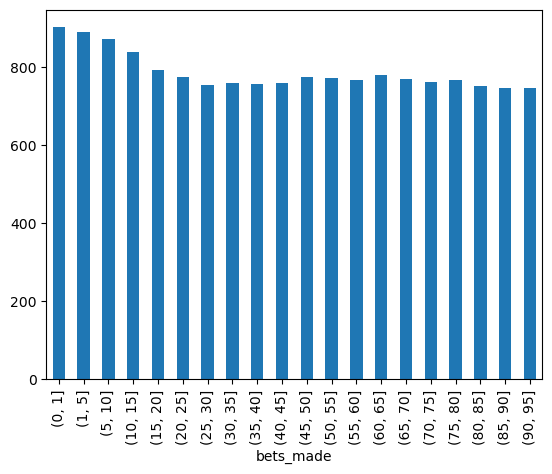

In [3]:
results = pd.DataFrame()

for i in range(10000):
    game = init_game(burn=1)
    sim(game)
    results = pd.concat((results, summarize(game, i)))
    
binned = pd.cut(results.bets_made, bins=[0, 1] + list(range(5, 100, 5)))
results.groupby(binned).balance.median().plot(kind='bar')

## $5 burn

<AxesSubplot: xlabel='bets_made'>

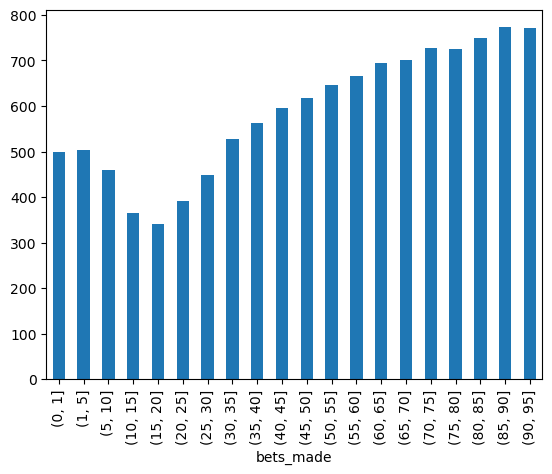

In [4]:
results = pd.DataFrame()

for i in range(10000):
    game = init_game(burn=5)
    sim(game)
    results = pd.concat((results, summarize(game, i)))
    
binned = pd.cut(results.bets_made, bins=[0, 1] + list(range(5, 100, 5)))
results.groupby(binned).balance.median().plot(kind='bar')

## $10 burn

<AxesSubplot: xlabel='bets_made'>

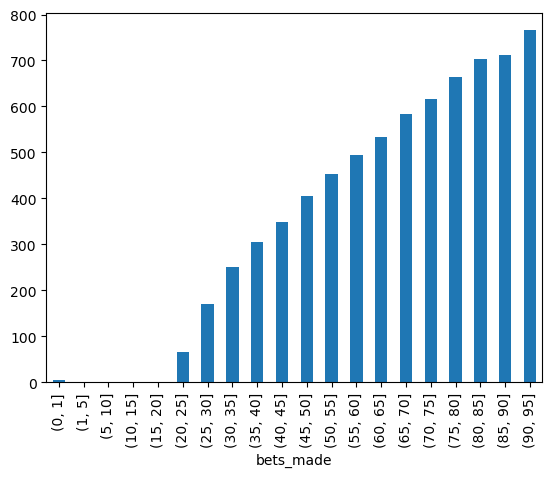

In [5]:
results = pd.DataFrame()

for i in range(10000):
    game = init_game(burn=10)
    sim(game)
    results = pd.concat((results, summarize(game, i)))
    
binned = pd.cut(results.bets_made, bins=[0, 1] + list(range(5, 100, 5)))
results.groupby(binned).balance.median().plot(kind='bar')

## With a $100 minimum balance

<AxesSubplot: xlabel='bets_made'>

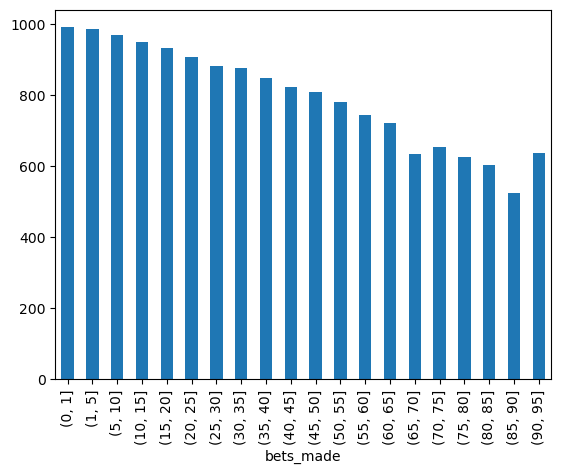

In [6]:
results = pd.DataFrame()

for i in range(10000):
    game = init_game(minBalance=100)
    sim(game)
    results = pd.concat((results, summarize(game, i)))
    
binned = pd.cut(results.bets_made, bins=[0, 1] + list(range(5, 100, 5)))
results.groupby(binned).balance.median().plot(kind='bar')

## $500 minimum

<AxesSubplot: xlabel='bets_made'>

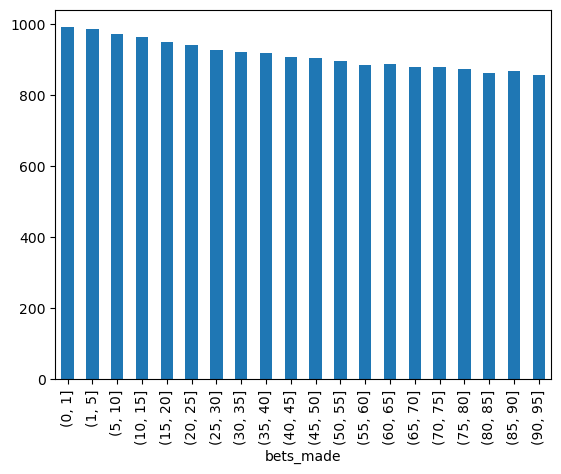

In [7]:
results = pd.DataFrame()

for i in range(10000):
    game = init_game(minBalance=500)
    sim(game)
    results = pd.concat((results, summarize(game, i)))
    
binned = pd.cut(results.bets_made, bins=[0, 1] + list(range(5, 100, 5)))
results.groupby(binned).balance.median().plot(kind='bar')

## $800 minimum

<AxesSubplot: xlabel='bets_made'>

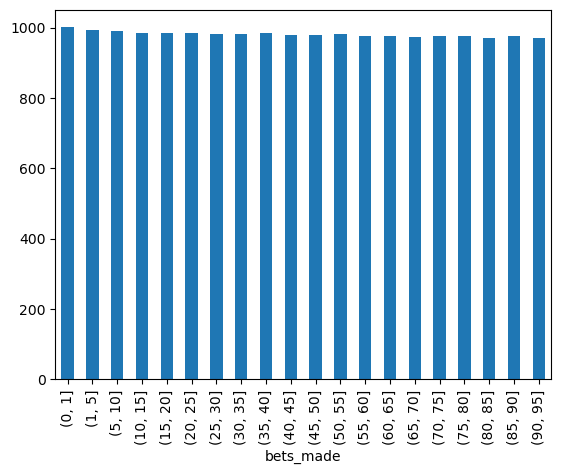

In [9]:
results = pd.DataFrame()

for i in range(10000):
    game = init_game(minBalance=800)
    sim(game)
    results = pd.concat((results, summarize(game, i)))
    
binned = pd.cut(results.bets_made, bins=[0, 1] + list(range(5, 100, 5)))
results.groupby(binned).balance.median().plot(kind='bar')

## Now throw it all together...

<AxesSubplot: xlabel='bets_made'>

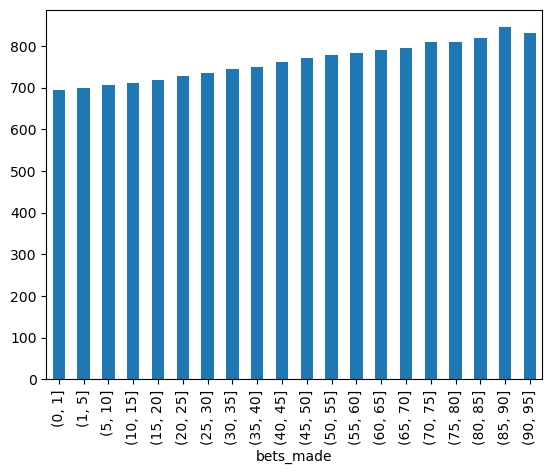

In [10]:
results = pd.DataFrame()

for i in range(10000):
    game = init_game(minBalance=500, burn=3)
    sim(game)
    results = pd.concat((results, summarize(game, i)))
    
binned = pd.cut(results.bets_made, bins=[0, 1] + list(range(5, 100, 5)))
results.groupby(binned).balance.median().plot(kind='bar')